# KNN - N Nearest Neighbors

## Iris dataset
<img src = iris.jpg>

# Step-by-step Project and Comments (below)

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading dataset

In [2]:
df = pd.read_csv("iris.csv")

# EAD

In [3]:
# close look at the dataset
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# lines and columns of the dataset
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# checking quantity of each specie
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
# checking missing values
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

No missing values

In [8]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

#### Hypothesis

Similar data tend to be close to each other in the same dispersion spot



#### Data Visualization

* Scatter plots (2 modes)

 MODE 1

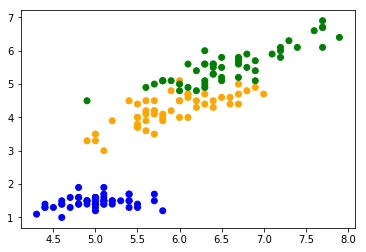

In [9]:
#scatter plot #1 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['SepalLength'], df['PetalLength'],c=df['Species'].apply(lambda x: colors[x]))

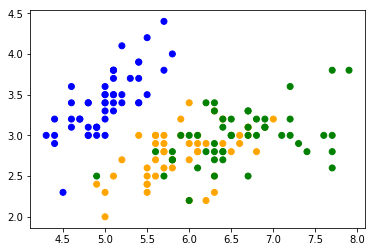

In [10]:
#scatter plot #2 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['SepalLength'], df['SepalWidth'],c=df['Species'].apply(lambda x: colors[x]))

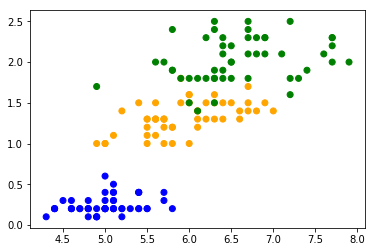

In [11]:
#scatter plot #3 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['SepalLength'], df['PetalWidth'],c=df['Species'].apply(lambda x: colors[x]))

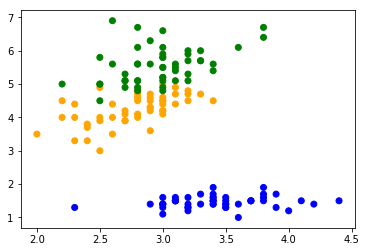

In [12]:
#scatter plot #4 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['SepalWidth'], df['PetalLength'],c=df['Species'].apply(lambda x: colors[x]))

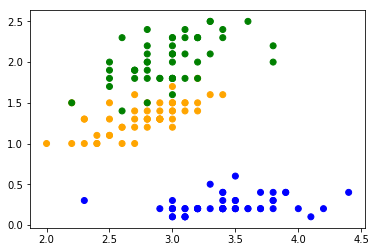

In [13]:
#scatter plot #5 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['SepalWidth'], df['PetalWidth'],c=df['Species'].apply(lambda x: colors[x]))

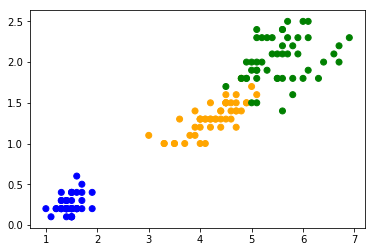

In [14]:
#scatter plot #6 
fig, ax = plt.subplots()
colors = {'Iris-setosa':'blue', 'Iris-virginica':'green', 'Iris-versicolor':'orange'}

ax.scatter(df['PetalLength'], df['PetalWidth'],c=df['Species'].apply(lambda x: colors[x]))

Looking at those 6 plots we can come to conclusions:

* Iris-setosa species are very well identified and separated from the other species
* Apart from plot #2, all plots show that species are very well identified and separated
* plot #2 shows that two species might cause confusion to separate, such as Iris-virginica and Iris-versicolor

 MODE 2

In [15]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


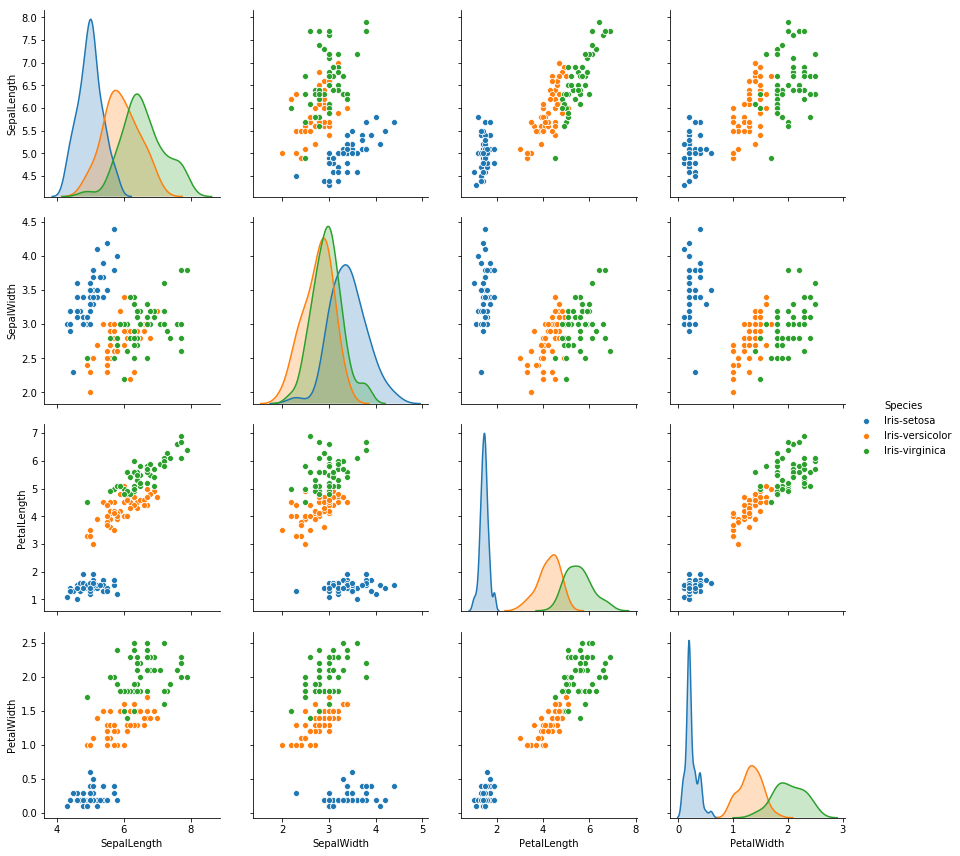

In [16]:
import seaborn as sns

sns.pairplot(df, hue='Species', size=3)

Looking at those 6 plots we can come to conclusions:

* Iris-setosa species are very well identified and separated from the other species
* Apart from plot #2, all plots show that species are very well identified and separated
* plot #2 shows that two species might cause confusion to separate, such as Iris-virginica and Iris-versicolor

In [ ]:
import seaborn as sns

tips = df
a = df.PetalLength
b = df.PetalWidth
grid = sns.JointGrid(x=a, y=b, data=tips)

g = grid.plot_joint(sns.scatterplot, hue='Species', data=tips)
sns.kdeplot(tips.loc[tips['Species']=='Iris-setosa', a], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['Species']=='Iris-versicolor', a], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['Species']=='Iris-virginica', a], ax=g.ax_marg_x, legend=False)

sns.kdeplot(tips.loc[tips['Species']=='Yes', b], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(tips.loc[tips['Species']=='No', b], ax=g.ax_marg_y, vertical=True, legend=False)
ns.kdeplot(tips.loc[tips['Species']=='No', b], ax=g.ax_marg_y, vertical=True, legend=False)

#  MACHINE LEARNIG

### Splitting data into TRAINING DATA and TESTING DATA

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split (df.drop('Species',axis=1),df['Species'],test_size=0.3,random_state=42)

### Checking .shape (lines and columns)

In [20]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [21]:
y_train.shape,y_test.shape

((105,), (45,))

### Instantiating model

*n_neighbors is the K parameter of KNN model*

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [23]:
model = KNeighborsClassifier()

### .fit (training)

In [24]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### . predict (testing)

In [25]:
yhat = model.predict(X_test)
yhat

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
yhat_proba = model.predict_proba(X_test)
yhat_proba

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.8

## Validation Techniques

### Confusion Matrix

In [27]:
print (pd.crosstab(yhat,y_test, rownames=['PREDICT'], colnames=['                       REAL'], margins=True))

                       REAL  Iris-setosa  Iris-versicolor  Iris-virginica  All
PREDICT                                                                       
Iris-setosa                           19                0               0   19
Iris-versicolor                        0               13               0   13
Iris-virginica                         0                0              13   13
All                                   19               13              13   45


### Metrics of classification

In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy=', (accuracy_score(y_test, yhat)*100).round(2))

Accuracy= 100.0


In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test,yhat,target_names=df['Species'].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Curve ROC-AUC

#### c.e: Binary Classification (1 e 0)

In [30]:
# AUC metric is only used in binary classification problem (**BE CAREFULL**)
'''auc = metrics.roc_auc_score(y_test, yhat_proba)
'''

'auc = metrics.roc_auc_score(y_test, yhat_proba)\n'

### Cross Validation   

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df.drop('Species',axis=1),df['Species'], cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [32]:
((scores.mean())*100).round(2)

97.33

The most importante metric for classification are: Accucary, Precision, Recall and F1_score. Those have been calculated above.
    
Conclusion: 
* The overview score (accuracy) of the model is 88.89% which tells us how many datas were properly estimated (in this case the number is High)
* Precision, Recall and F1-score are high as well. 
  - Precision shows us how precise our model is (macro avg = 90.67%)
  - Recall show us how many True Positive (TP) were properly estimated (in this case the number is High = 89%)
  - F1-score tells us an average between Precision and Recall (in this case the number is High = 88%)


### How great the model is...

In [33]:
# comparative between CORRECT answer and WRONG answer to get to know if the model is good
comparative = list(zip(list(y_test), list(yhat))) #primeiro item da primeira lista com o primeiro item da segunda lista

correct = 0
wrong = 0

for row in comparative:
    if row[0]==row[1]:
        correct += 1
    else:
        wrong += 1
        
print(f'''Correct Answers: {correct},
Errors: {wrong},
Percentage: {((correct/(correct+wrong))*100)}''')

Correct Answers: 45,
Errors: 0,
Percentage: 100.0


## [GRID SEARCH] Otimization K parameter

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
k_list = list(range(1,31))

In [36]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [37]:
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [38]:
grid.fit(df.drop('Species',axis=1),df['Species'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
# The best K (n_neighbors)
grid.best_params_

{'n_neighbors': 6}

In [40]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [41]:
# The best results
grid.cv_results_

{'mean_fit_time': array([0.00359797, 0.00139937, 0.00139937, 0.00099921, 0.00119615,
        0.00119905, 0.0011992 , 0.0012012 , 0.00119939, 0.00119934,
        0.00119953, 0.00119939, 0.00119934, 0.00119948, 0.0009995 ,
        0.00119934, 0.00139942, 0.00119934, 0.00119953, 0.00119929,
        0.00119963, 0.00099959, 0.00119939, 0.00119953, 0.00119944,
        0.00139933, 0.00119939, 0.00139933, 0.00139923, 0.0009995 ]),
 'std_fit_time': array([2.05777725e-03, 4.89609456e-04, 4.89512201e-04, 3.98950589e-07,
        3.92794649e-04, 3.99923396e-04, 3.99732775e-04, 3.98985080e-04,
        3.99756442e-04, 3.99661075e-04, 3.99804183e-04, 3.99875669e-04,
        3.99661075e-04, 3.99827971e-04, 1.78416128e-07, 3.99780302e-04,
        4.89667781e-04, 3.99661075e-04, 3.99565736e-04, 3.99565707e-04,
        3.99756442e-04, 1.16800773e-07, 3.99756499e-04, 3.99923367e-04,
        3.99613420e-04, 4.89550980e-04, 3.99518052e-04, 4.89648320e-04,
        4.89531566e-04, 2.33601546e-07]),
 'mean_scor

In [42]:
# Resume of the GRIDSEARCH TEST
print("Best parameters set found on development set:")
print(grid.best_params_)

print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))    

Best parameters set found on development set:
{'n_neighbors': 6}
Grid scores on development set:
0.960 (+/-0.050) for {'n_neighbors': 1}
0.947 (+/-0.068) for {'n_neighbors': 2}
0.967 (+/-0.042) for {'n_neighbors': 3}
0.973 (+/-0.027) for {'n_neighbors': 4}
0.973 (+/-0.050) for {'n_neighbors': 5}
0.980 (+/-0.033) for {'n_neighbors': 6}
0.980 (+/-0.033) for {'n_neighbors': 7}
0.967 (+/-0.060) for {'n_neighbors': 8}
0.973 (+/-0.050) for {'n_neighbors': 9}
0.980 (+/-0.053) for {'n_neighbors': 10}
0.980 (+/-0.053) for {'n_neighbors': 11}
0.980 (+/-0.053) for {'n_neighbors': 12}
0.973 (+/-0.050) for {'n_neighbors': 13}
0.967 (+/-0.060) for {'n_neighbors': 14}
0.967 (+/-0.060) for {'n_neighbors': 15}
0.967 (+/-0.060) for {'n_neighbors': 16}
0.967 (+/-0.060) for {'n_neighbors': 17}
0.967 (+/-0.060) for {'n_neighbors': 18}
0.967 (+/-0.060) for {'n_neighbors': 19}
0.960 (+/-0.065) for {'n_neighbors': 20}
0.967 (+/-0.060) for {'n_neighbors': 21}
0.960 (+/-0.065) for {'n_neighbors': 22}
0.960 (+/-

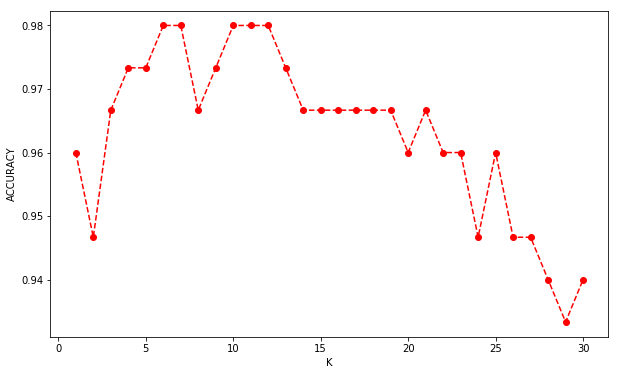

In [43]:
scores=[]
for score in means:
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('K')
plt.ylabel('ACCURACY')
plt.show()

The graph above shows the performance of each value's K versus Metric (accuracy). It's pretty easy to figure out that K equals to 6, reaches the highest Accuracy (around 0.98)

In [44]:
print("The Best K value is: {} with accuracy approximately equal to {}".format(grid.best_params_,grid.best_score_))

The Best K value is: {'n_neighbors': 6} with accuracy approximately equal to 0.98


# Aplying one more time with IDEAL K

In [45]:
df2 = pd.read_csv("iris.csv")

In [46]:
df2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting data into TRAINING DATA and TESTING DATA

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split (df2.drop('Species',axis=1),df2['Species'],test_size=0.3, random_state=420)

### Checking .shape (lines and columns)

In [49]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [50]:
y_train.shape,y_test.shape

((105,), (45,))

### Instantiating model

*n_neighbors is the K parameter of KNN model*

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [52]:
model2 = KNeighborsClassifier()

### .fit (training)

In [53]:
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### . predict (testing)

In [54]:
yhat = model2.predict(X_test)
yhat

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype=object)

## Validation Techniques

### Confusion Matrix

In [55]:
print (pd.crosstab(yhat,y_test, rownames=['PREDICT'], colnames=['                       REAL'], margins=True))

                       REAL  Iris-setosa  Iris-versicolor  Iris-virginica  All
PREDICT                                                                       
Iris-setosa                           15                0               0   15
Iris-versicolor                        0               18               0   18
Iris-virginica                         0                2              10   12
All                                   15               20              10   45


### Metrics of classification

In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy=', (accuracy_score(y_test, yhat)*100).round(2))

Accuracy= 95.56


In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test,yhat,target_names=df2['Species'].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.83      1.00      0.91        10

      micro avg       0.96      0.96      0.96        45
      macro avg       0.94      0.97      0.95        45
   weighted avg       0.96      0.96      0.96        45



### How great the model is...

In [58]:
# comparative between CORRECT answer and WRONG answer to get to know if the model is good
comparative = list(zip(list(y_test), list(yhat))) #primeiro item da primeira lista com o primeiro item da segunda lista

correct = 0
wrong = 0

for row in comparative:
    if row[0]==row[1]:
        correct += 1
    else:
        wrong += 1
        
print(f'''Correct Answers: {correct},
Errors: {wrong},
Percentage: {((correct/(correct+wrong))*100)}''')

Correct Answers: 43,
Errors: 2,
Percentage: 95.55555555555556


### Cross Validation   

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, df2.drop('Species',axis=1),df2['Species'], cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [60]:
((scores.mean())*100).round(2)

97.33

### Conclusion:
Using k=6 makes the results and metrics much better than before!!!

- Old Accuracy = 88.89% ..........**** New Accuracy = 97.78%

- Old Precision = 90.67% ..........****New Precision = 98.00%

- Old Recall = 89.00% .......... ****New Precision = 97.00%

- Old F1-score = 88.00% .......... ****New F1-score = 97.33%

- First Outcome = 5 errors and 40 correct asnwers .......... ****Final Outcome = 1 error(s) and 44 correct asnwers


# Final Conclusion


The main purpose of the IRIS dataset was to find a model, and its respective metrics, that best separate the data into 3 different species types, namely:

* Iris-versicolor
* Iris-virginica
* Iris-setosa

According to the results achieved through exploratory analysis of data, graphs and interpretations described throughout the notebook, the KNN model with a K value of 6 obtained a final result of approximately 98% (97.78%). This means that out of every 100 data, 98 of them are correctly classified (only 2% error).


Another interesting aspect to be commented on, was the model upgrade using the value of K equal to 6. If we compare the first model with the second model, we see a significant increase in accuracy of 10%, from 88.89% up to 97.78%.
